## Cell 1: Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]
print("✅ Libraries loaded!")

✅ Libraries loaded!


## Cell 2: Load Final Dataset

In [17]:
df = pd.read_csv('data/final/enviroscan_final_dataset.csv')
print(f"✅ Loaded: {len(df):,} records × {len(df.columns)} columns")

✅ Loaded: 106,369 records × 33 columns


## Cell 3: Dataset Overview
Quick look at dataset structure and data types.

In [18]:
print("📊 DATASET OVERVIEW")
print("="*50)
print(f"Rows: {len(df):,}")
print(f"Columns: {len(df.columns)}")
print(f"\nStates: {df['state'].nunique()}")
print(f"Districts: {df['district'].nunique()}")
print(f"Locations: {df['location_id'].nunique() if 'location_id' in df.columns else 'N/A'}")

print("\n📋 Column Types:")
print(df.dtypes.value_counts())

print("\n📋 Sample Data:")
df.head(3)

📊 DATASET OVERVIEW
Rows: 106,369
Columns: 33

States: 19
Districts: 49
Locations: 49

📋 Column Types:
float64    17
int64       9
object      7
Name: count, dtype: int64

📋 Sample Data:


,state,district,location_id,location_name,latitude,longitude,datetime_ist,hour,day_of_week,month,...,roads_count,industrial_distance_m,industrial_area_sqm,agricultural_distance_m,agricultural_area_sqm,dump_sites_distance_m,dump_sites_count,pollution_source,source_encoded,confidence
0,Andhra Pradesh,Tirupati,5649,"Tirumala, Tirupati - APPCB",13.67,79.35,2025-11-08 15:15:00+05:30,15,5,11,...,67,396.9,7470.18,9999.0,0.0,976.01,3,Natural,4,Low
1,Andhra Pradesh,Tirupati,5649,"Tirumala, Tirupati - APPCB",13.67,79.35,2025-11-08 15:30:00+05:30,15,5,11,...,67,396.9,7470.18,9999.0,0.0,976.01,3,Burning,3,Low
2,Andhra Pradesh,Tirupati,5649,"Tirumala, Tirupati - APPCB",13.67,79.35,2025-11-08 15:45:00+05:30,15,5,11,...,67,396.9,7470.18,9999.0,0.0,976.01,3,Burning,3,Low


## Cell 4: Missing Values Check
Check which columns have missing values.

In [19]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing': missing, 'Percent': missing_pct})
missing_df = missing_df[missing_df['Missing'] > 0].sort_values('Percent', ascending=False)

if len(missing_df) > 0:
    print("⚠️ Columns with Missing Values:")
    print(missing_df)
else:
    print("✅ No missing values in the dataset!")

✅ No missing values in the dataset!


## Cell 5: Label Distribution
Check how records are distributed across pollution sources.

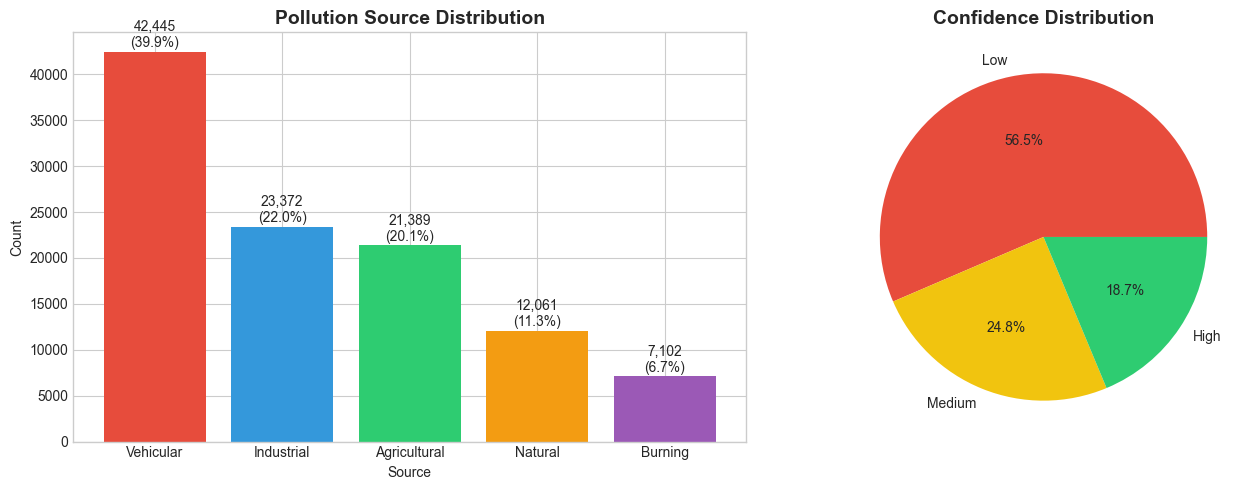


📊 Source Distribution:
   Vehicular      : 42,445 ( 39.9%)
   Industrial     : 23,372 ( 22.0%)
   Agricultural   : 21,389 ( 20.1%)
   Natural        : 12,061 ( 11.3%)
   Burning        :  7,102 (  6.7%)


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pollution Source Distribution
source_counts = df['pollution_source'].value_counts()
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
axes[0].bar(source_counts.index, source_counts.values, color=colors)
axes[0].set_title('Pollution Source Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Source')
axes[0].set_ylabel('Count')
for i, v in enumerate(source_counts.values):
    axes[0].text(i, v + 500, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center')

# Confidence Distribution
conf_counts = df['confidence'].value_counts()
conf_colors = {'High': '#2ecc71', 'Medium': '#f1c40f', 'Low': '#e74c3c'}
axes[1].pie(conf_counts.values, labels=conf_counts.index, autopct='%1.1f%%', 
            colors=[conf_colors[x] for x in conf_counts.index])
axes[1].set_title('Confidence Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('data/final/eda_label_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Source Distribution:")
for src, count in source_counts.items():
    print(f"   {src:15}: {count:>6,} ({count/len(df)*100:>5.1f}%)")

## Cell 6: Pollutant Statistics by Source
Compare average pollutant levels across pollution sources.

📊 Pollutant Statistics by Source:
                   pm25                  pm10                   no2         \
                   mean    std median    mean    std  median   mean    std   
pollution_source                                                             
Agricultural      51.65  39.74  49.00  105.23  74.69  101.00  11.01  12.86   
Burning           61.53  35.66  61.77   94.80  55.85   94.00  12.11   5.27   
Industrial        71.54  49.78  63.47  120.17  68.42  102.98  23.43  25.49   
Natural           29.68  18.89  29.22   79.65  45.67   82.57  10.04   7.28   
Vehicular         67.93  62.91  52.87  131.30  94.25  108.94  29.05  27.00   

                           co                 so2                   o3         \
                 median  mean   std median   mean    std median   mean    std   
pollution_source                                                                
Agricultural       5.82  0.68  0.57   0.58  12.37  15.56   7.10  32.78  34.69   
Burning          

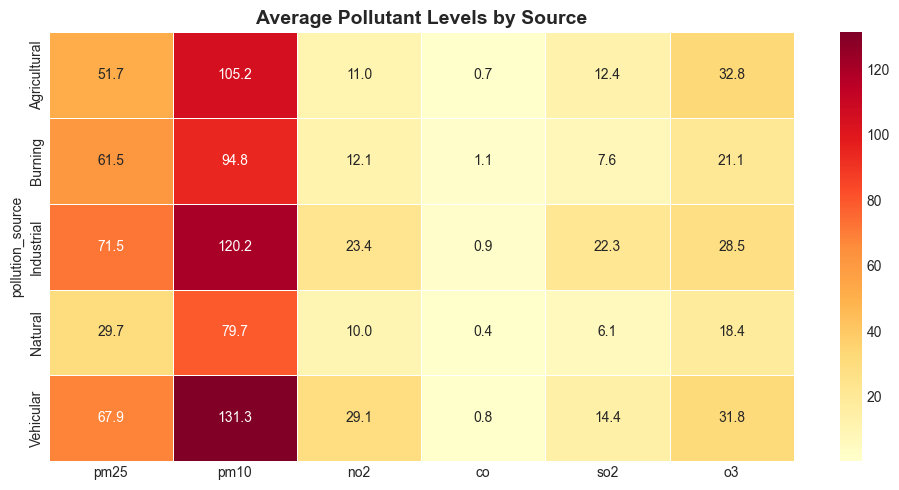

In [21]:
pollutants = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3']
pollutants = [p for p in pollutants if p in df.columns]

stats = df.groupby('pollution_source')[pollutants].agg(['mean', 'std', 'median']).round(2)
print("📊 Pollutant Statistics by Source:")
print(stats)

# Heatmap of means
means = df.groupby('pollution_source')[pollutants].mean()
plt.figure(figsize=(10, 5))
sns.heatmap(means, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5)
plt.title('Average Pollutant Levels by Source', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('data/final/eda_pollutant_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## Cell 7: Pollutant Boxplots
Compare pollutant distributions across sources.

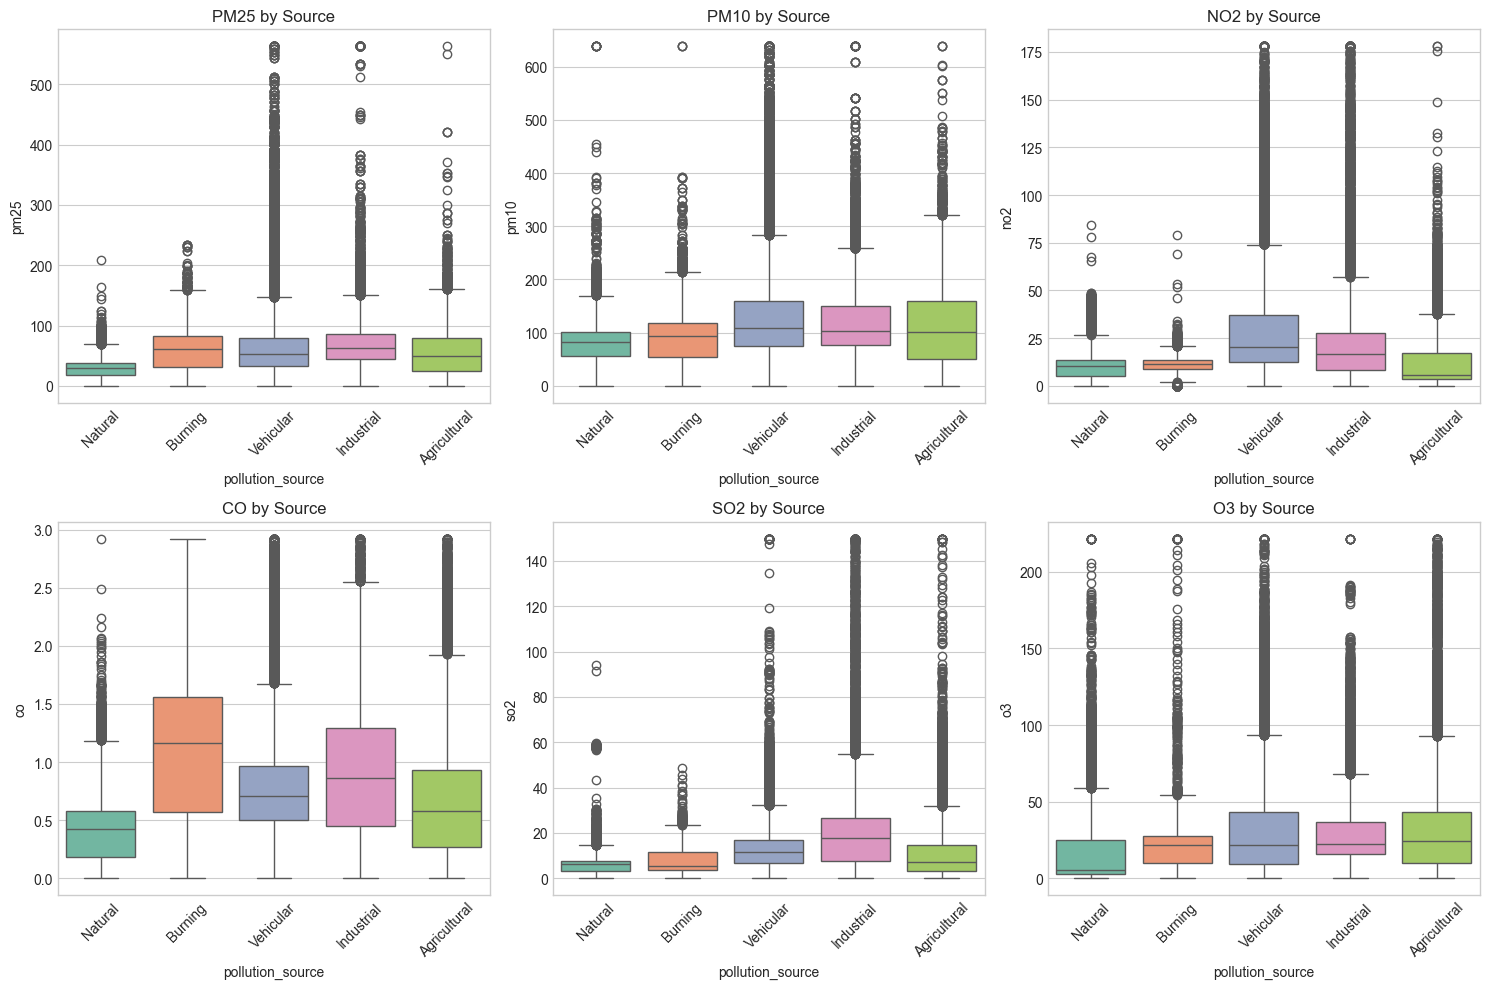

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, pol in enumerate(pollutants):
    sns.boxplot(data=df, x='pollution_source', y=pol, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{pol.upper()} by Source')
    axes[i].tick_params(axis='x', rotation=45)

# Hide extra subplot if any
for i in range(len(pollutants), 6):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('data/final/eda_pollutant_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

## Cell 8: Temporal Patterns - Hourly
See how pollution sources vary by hour of day.

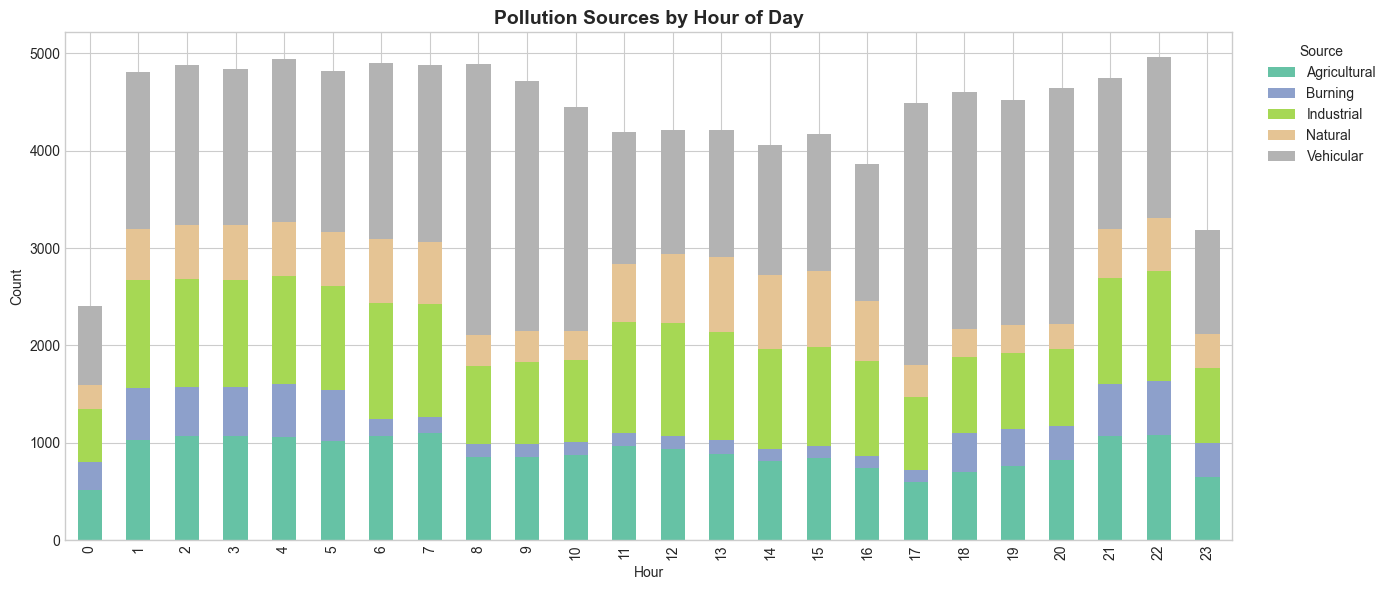


📊 Rush Hour Analysis:
pollution_source  Agricultural  Burning  Industrial  Natural  Vehicular
is_rush_hour                                                           
Non-Rush Hour            15916     5461       17782     9953      24960
Rush Hour                 5473     1641        5590     2108      17485


In [23]:
hourly = df.groupby(['hour', 'pollution_source']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
hourly.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Pollution Sources by Hour of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Source', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('data/final/eda_hourly_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Rush Hour Analysis:")
if 'is_rush_hour' in df.columns:
    rush = df.groupby(['is_rush_hour', 'pollution_source']).size().unstack(fill_value=0)
    rush['is_rush_hour'] = ['Non-Rush Hour', 'Rush Hour']
    print(rush.set_index('is_rush_hour'))

## Cell 9: Seasonal Patterns
Compare pollution sources across seasons.

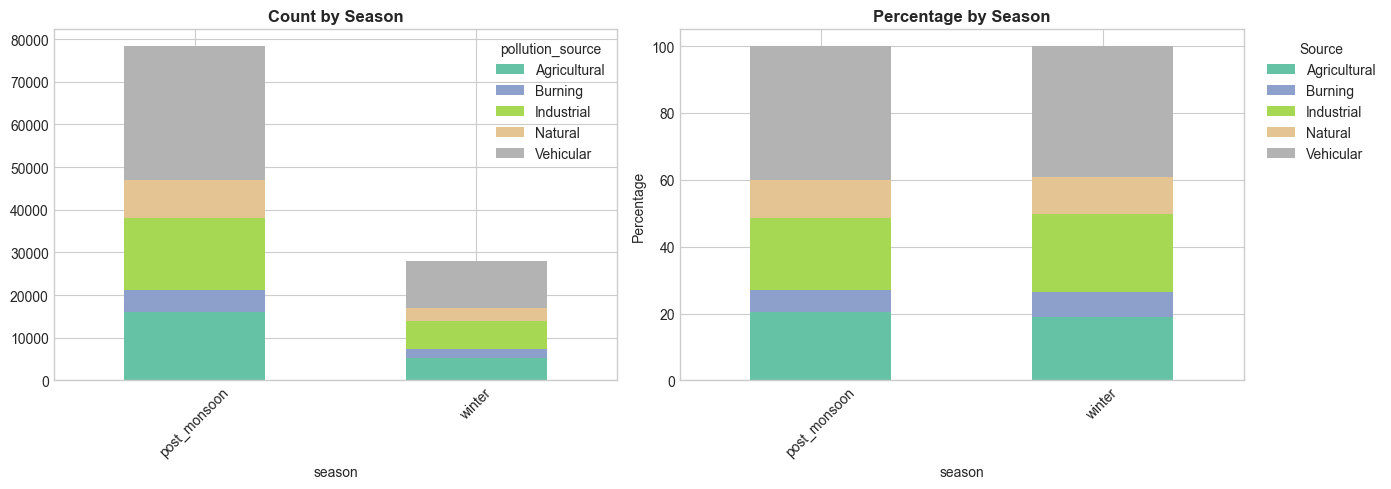

In [24]:
if 'season' in df.columns:
    seasonal = df.groupby(['season', 'pollution_source']).size().unstack(fill_value=0)
    seasonal_pct = seasonal.div(seasonal.sum(axis=1), axis=0) * 100
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    seasonal.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[0])
    axes[0].set_title('Count by Season', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='x', rotation=45)
    
    seasonal_pct.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[1])
    axes[1].set_title('Percentage by Season', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].legend(title='Source', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig('data/final/eda_seasonal_patterns.png', dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("⚠️ 'season' column not found")

## Cell 10: State-wise Distribution
See pollution sources distribution by state.

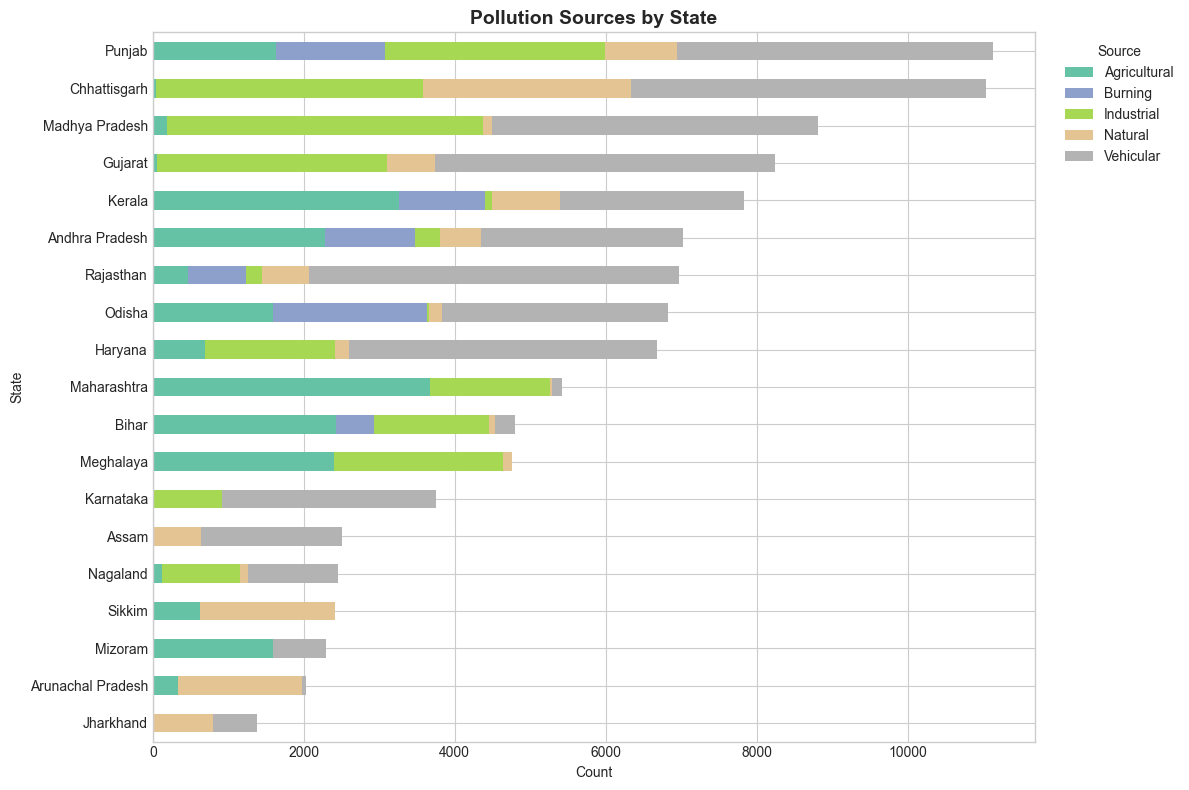


📊 Top 5 States by Record Count:
   Punjab: 11,129
   Chhattisgarh: 11,037
   Madhya Pradesh: 8,817
   Gujarat: 8,246
   Kerala: 7,834


In [25]:
state_source = df.groupby(['state', 'pollution_source']).size().unstack(fill_value=0)
state_source['Total'] = state_source.sum(axis=1)
state_source = state_source.sort_values('Total', ascending=True).drop('Total', axis=1)

plt.figure(figsize=(12, max(8, len(state_source) * 0.3)))
state_source.plot(kind='barh', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Pollution Sources by State', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Source', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig('data/final/eda_state_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n📊 Top 5 States by Record Count:")
top_states = df['state'].value_counts().head(5)
for state, count in top_states.items():
    print(f"   {state}: {count:,}")

## Cell 11: Feature Correlations
Check correlations between numerical features.

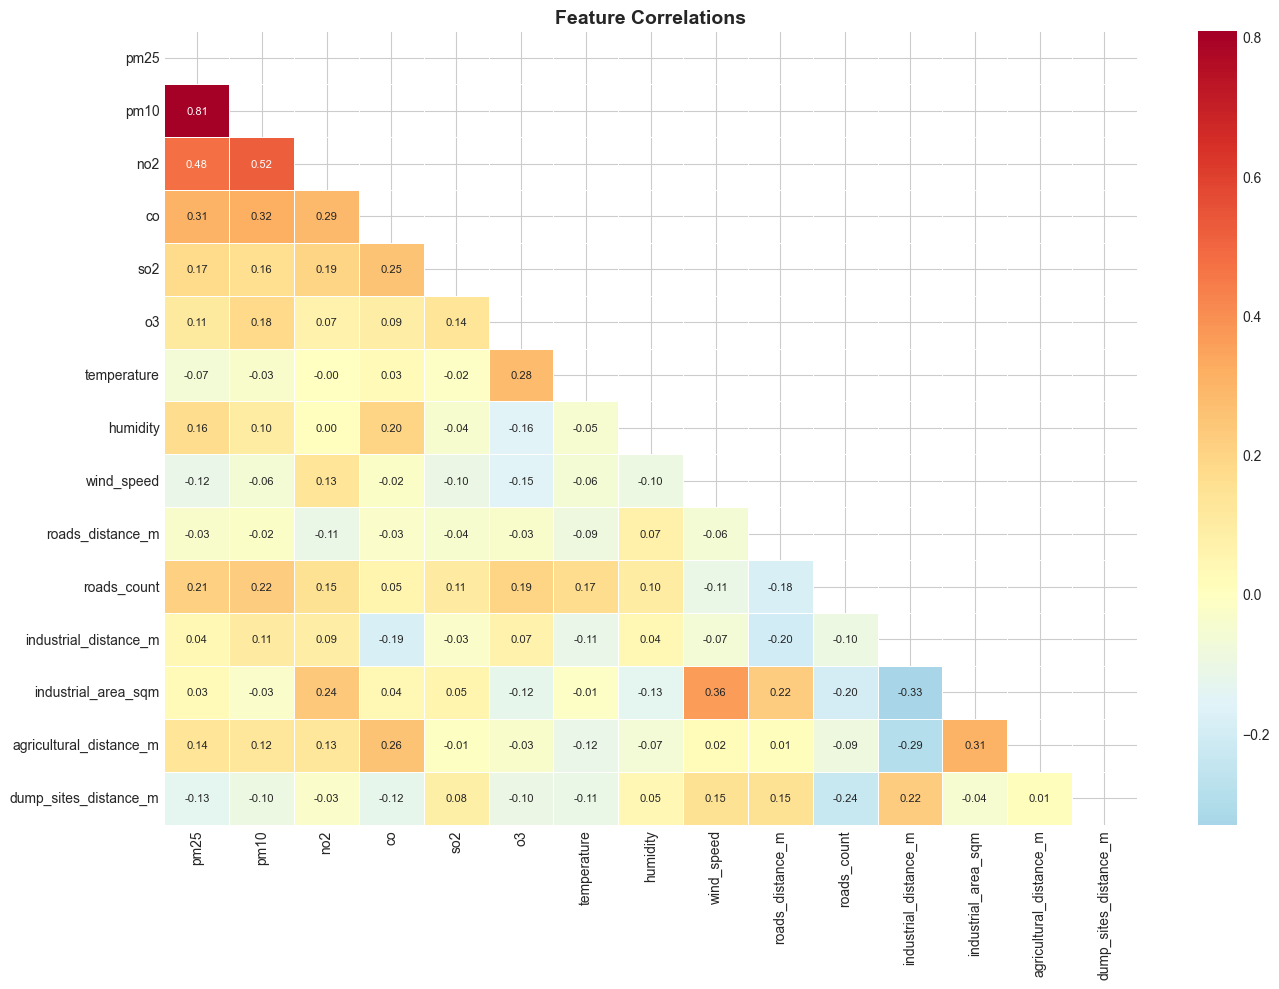


📊 Top Correlations with Source Label:
   no2                      : 0.323
   roads_count              : 0.321
   pm10                     : 0.216
   pm25                     : 0.215
   so2                      : 0.197
   roads_distance_m         : 0.166
   co                       : 0.138
   agricultural_distance_m  : 0.136


In [26]:
# Select numerical columns for correlation
num_cols = ['pm25', 'pm10', 'no2', 'co', 'so2', 'o3', 'temperature', 'humidity', 'wind_speed',
            'roads_distance_m', 'roads_count', 'industrial_distance_m', 'industrial_area_sqm',
            'agricultural_distance_m', 'dump_sites_distance_m']
num_cols = [c for c in num_cols if c in df.columns]

corr = df[num_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, linewidths=0.5, annot_kws={'size': 8})
plt.title('Feature Correlations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('data/final/eda_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

# Correlation with source_encoded
if 'source_encoded' in df.columns:
    print("\n📊 Top Correlations with Source Label:")
    source_corr = df[num_cols + ['source_encoded']].corr()['source_encoded'].drop('source_encoded').abs().sort_values(ascending=False)
    for feat, val in source_corr.head(8).items():
        print(f"   {feat:25}: {val:.3f}")

## Cell 12: Spatial Feature Analysis
See how spatial features relate to pollution sources.

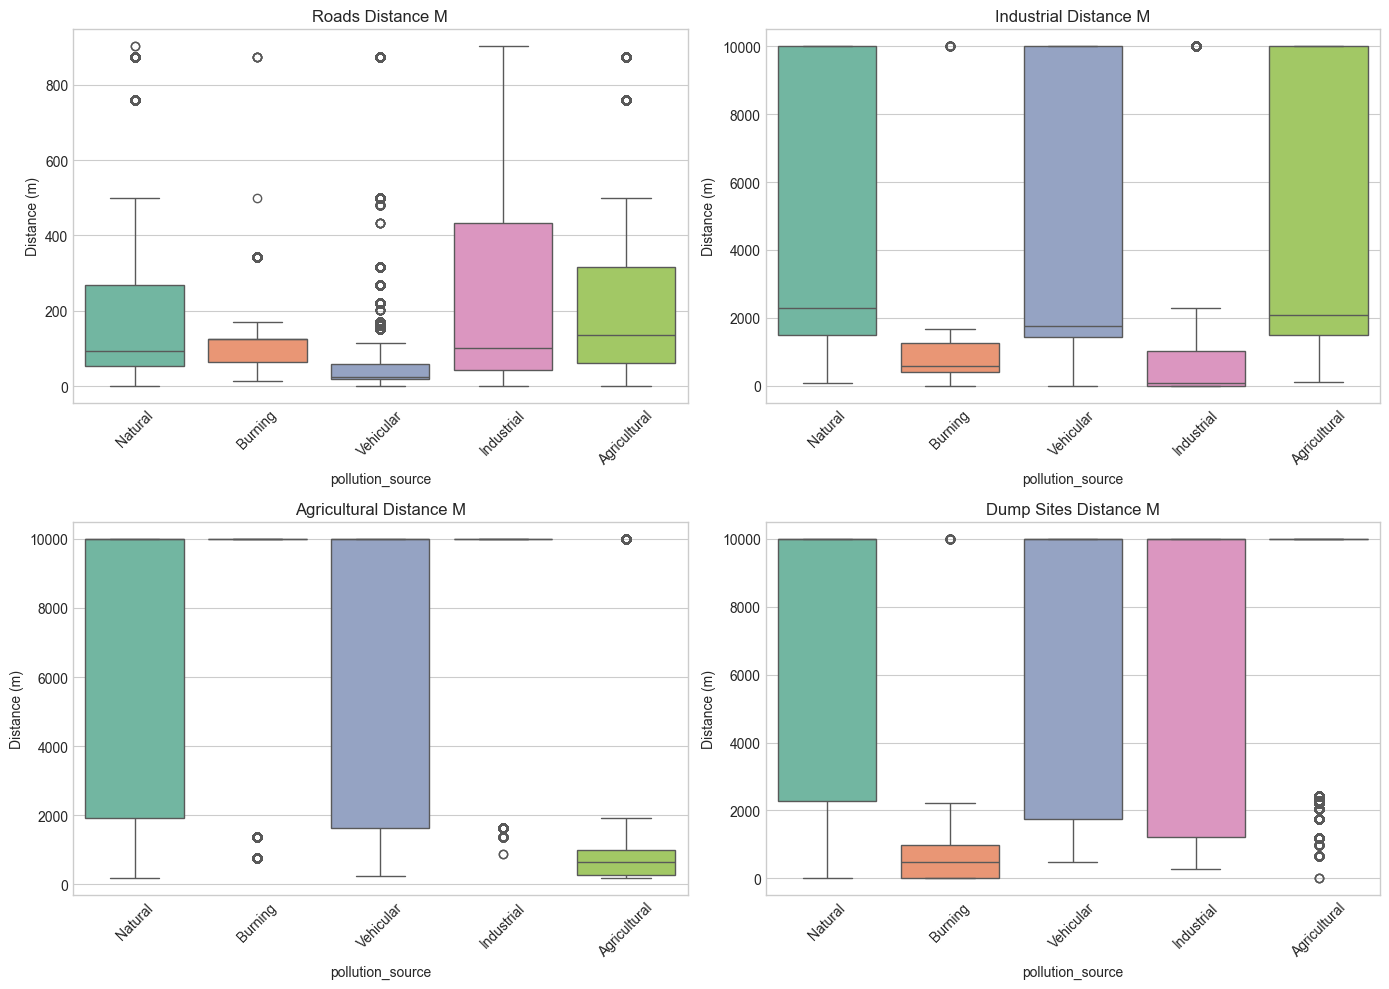


📊 Average Distances by Source (meters):
                  roads_distance_m  industrial_distance_m  \
pollution_source                                            
Agricultural                 234.6                 4743.1   
Burning                      133.6                  809.1   
Industrial                   289.6                  909.2   
Natural                      182.0                 5002.0   
Vehicular                     72.0                 4549.6   

                  agricultural_distance_m  dump_sites_distance_m  
pollution_source                                                  
Agricultural                       2356.8                 8088.6  
Burning                            8568.8                  590.6  
Industrial                         9596.5                 6059.4  
Natural                            7855.1                 6737.2  
Vehicular                          7758.5                 7263.2  


In [27]:
spatial_cols = ['roads_distance_m', 'industrial_distance_m', 'agricultural_distance_m', 'dump_sites_distance_m']
spatial_cols = [c for c in spatial_cols if c in df.columns]

if spatial_cols:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(spatial_cols):
        sns.boxplot(data=df, x='pollution_source', y=col, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{col.replace("_", " ").title()}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel('Distance (m)')
    
    plt.tight_layout()
    plt.savefig('data/final/eda_spatial_features.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\n📊 Average Distances by Source (meters):")
    print(df.groupby('pollution_source')[spatial_cols].mean().round(1))

## Cell 13: Class Balance Analysis
Check if dataset is balanced for model training.

In [28]:
source_counts = df['pollution_source'].value_counts()
max_count = source_counts.max()
min_count = source_counts.min()
imbalance_ratio = max_count / min_count

print("📊 CLASS BALANCE ANALYSIS")
print("="*50)
for src, count in source_counts.items():
    bar = '█' * int(count / max_count * 30)
    print(f"{src:15}: {count:>6,} ({count/len(df)*100:>5.1f}%) {bar}")

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 5:
    print("⚠️ High imbalance! Consider using SMOTE or class weights")
elif imbalance_ratio > 2:
    print("⚠️ Moderate imbalance. Consider stratified sampling")
else:
    print("✅ Dataset is reasonably balanced")

📊 CLASS BALANCE ANALYSIS
Vehicular      : 42,445 ( 39.9%) ██████████████████████████████
Industrial     : 23,372 ( 22.0%) ████████████████
Agricultural   : 21,389 ( 20.1%) ███████████████
Natural        : 12,061 ( 11.3%) ████████
Burning        :  7,102 (  6.7%) █████

Imbalance Ratio: 5.98:1
⚠️ High imbalance! Consider using SMOTE or class weights


## Cell 14: Training Set Analysis
Analyze the high-confidence training subset.

In [29]:
try:
    df_train = pd.read_csv('data/final/enviroscan_training_set.csv')
    print(f"📊 TRAINING SET ANALYSIS")
    print("="*50)
    print(f"Records: {len(df_train):,} ({len(df_train)/len(df)*100:.1f}% of full dataset)")
    
    print(f"\nLabel Distribution:")
    train_counts = df_train['pollution_source'].value_counts()
    for src, count in train_counts.items():
        print(f"   {src:15}: {count:>6,} ({count/len(df_train)*100:>5.1f}%)")
    
    print(f"\nConfidence Distribution:")
    for conf, count in df_train['confidence'].value_counts().items():
        print(f"   {conf:8}: {count:>6,}")
except FileNotFoundError:
    print("⚠️ Training set file not found. Run final_dataset_preparation.ipynb first.")

📊 TRAINING SET ANALYSIS
Records: 46,319 (43.5% of full dataset)

Label Distribution:
   Vehicular      : 17,231 ( 37.2%)
   Agricultural   : 10,740 ( 23.2%)
   Industrial     : 10,352 ( 22.3%)
   Natural        :  5,544 ( 12.0%)
   Burning        :  2,452 (  5.3%)

Confidence Distribution:
   Medium  : 26,418
   High    : 19,901


## Cell 15: Key Insights Summary
Summarize the main findings from EDA.

In [30]:
print("="*60)
print("📊 EDA SUMMARY - KEY INSIGHTS")
print("="*60)

print(f"\n1️⃣ Dataset Size: {len(df):,} records from {df['state'].nunique()} states")

print(f"\n2️⃣ Label Distribution:")
for src, count in df['pollution_source'].value_counts().items():
    print(f"   • {src}: {count/len(df)*100:.1f}%")

print(f"\n3️⃣ Confidence Levels:")
for conf, count in df['confidence'].value_counts().items():
    print(f"   • {conf}: {count/len(df)*100:.1f}%")

print(f"\n4️⃣ Key Pollutant Patterns:")
means = df.groupby('pollution_source')[['no2', 'so2', 'co', 'pm25']].mean()
print(f"   • Vehicular sources have highest avg NO2: {means.loc['Vehicular', 'no2']:.1f}" if 'Vehicular' in means.index else "")
print(f"   • Industrial sources have highest avg SO2: {means.loc['Industrial', 'so2']:.1f}" if 'Industrial' in means.index else "")

print(f"\n5️⃣ Imbalance Ratio: {imbalance_ratio:.2f}:1")

print("\n" + "="*60)
print("✅ EDA COMPLETE!")
print("="*60)
print("\nNext Steps:")
print("1. Use enviroscan_training_set.csv for model training")
print("2. Consider class balancing techniques")
print("3. Feature selection based on correlations")

📊 EDA SUMMARY - KEY INSIGHTS

1️⃣ Dataset Size: 106,369 records from 19 states

2️⃣ Label Distribution:
   • Vehicular: 39.9%
   • Industrial: 22.0%
   • Agricultural: 20.1%
   • Natural: 11.3%
   • Burning: 6.7%

3️⃣ Confidence Levels:
   • Low: 56.5%
   • Medium: 24.8%
   • High: 18.7%

4️⃣ Key Pollutant Patterns:
   • Vehicular sources have highest avg NO2: 29.1
   • Industrial sources have highest avg SO2: 22.3

5️⃣ Imbalance Ratio: 5.98:1

✅ EDA COMPLETE!

Next Steps:
1. Use enviroscan_training_set.csv for model training
2. Consider class balancing techniques
3. Feature selection based on correlations
